In [1]:
#https://filterpy.readthedocs.io/en/latest/
try:
  import lcapy
except ModuleNotFoundError:
  print("Could not find lcapy - installing")
  !pip install lcapy
  
from lcapy import Circuit, j, omega, s, exp, t
from lcapy import R, C, L
from lcapy import *

import numpy as np
from numpy import logspace

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, savefig

%matplotlib inline
# plotting time period
tt = np.linspace(0, 5, 1000)

from sympy import lambdify, oo, Symbol, integrate, Heaviside, plot, Piecewise

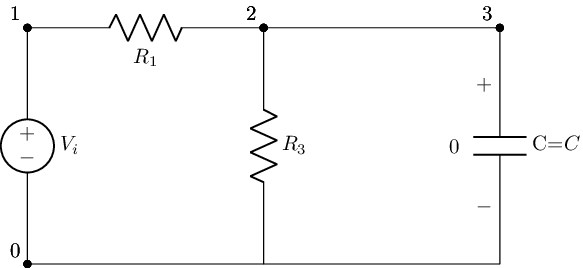

In [2]:
# Form circuit
RR1 = 1
RR3 = 2

cct2 = Circuit("""
Vi 1 0 ; down=2
R1 1 2 ; right=2
R3 2 0_2 ; down=2
W 2 3; right=2
C 3 0_3 C 0; down=2, , v=0
W 0 0_2; right
W 0_2 0_3; right""")

cct2.draw()

In [3]:
w = u(t) # find step response
cct2a = cct2.subs({'Vi':w, 'R1': RR1, 'C':1, 'R3':RR3})

#Given the step response, find the impulse response
g = diff(cct2a.C.v(t),t)
g

In [4]:
from lcapy import exp, t
# Can apply the same technique to find 
wfull = exp(-t) * u(t)
cct2f = cct2.subs({'Vi':wfull, 'R1': RR1, 'C':1, 'R3':RR3})
Vcf = cct2f.C.v.evaluate(tt)

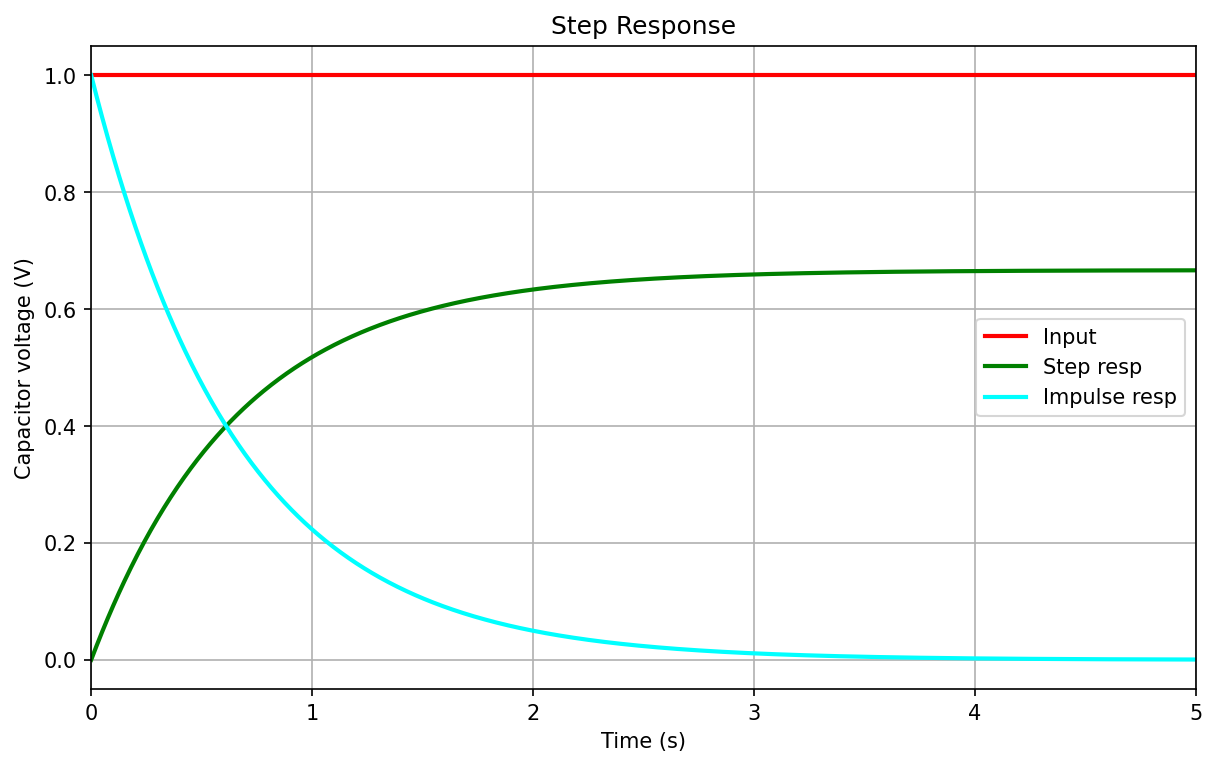

In [8]:
# find the voltage across the capacitor
Vc = cct2a.C.v.evaluate(tt) # step resp
Vg = g.evaluate(tt) # impulse resp

fig = figure(figsize=(8, 5),dpi=150,constrained_layout = True)
ax = fig.add_subplot(111, title='Step Response')
ax.plot(tt, cct2a.Vi.v.evaluate(tt), linewidth=2, color='red', label='Input')
ax.plot(tt, Vc, linewidth=2, color='green', label='Step resp')
ax.plot(tt, Vg, linewidth=2, color='cyan', label='Impulse resp')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Capacitor voltage (V)');
ax.grid()
plt.xlim(0,5)
plt.legend()
plt.show()

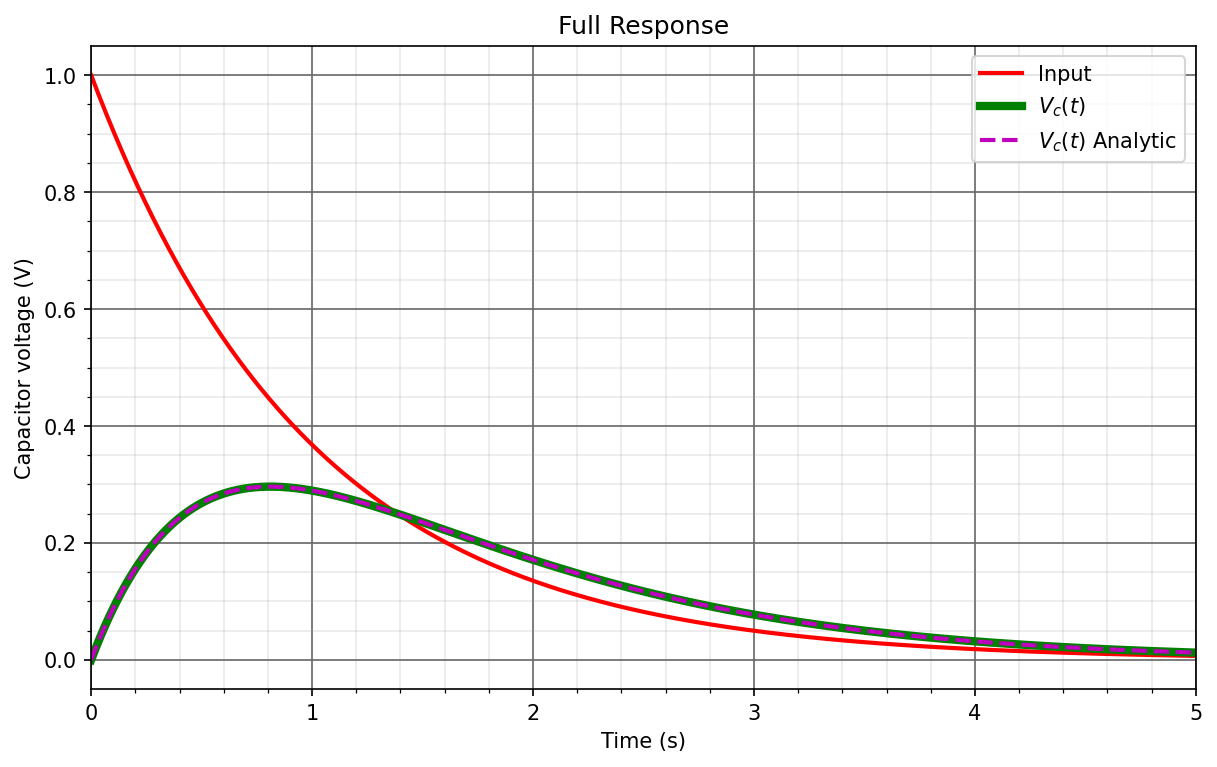

In [6]:
# Plot response to full input and compare to analytic

# compute quantities needed
Req = 1/RR1 + 1/RR3
# Expression given in notes for comparison
e_analytic = 2*(np.exp( -1 * tt) - np.exp( -1.5 * tt)) 

fig = figure(figsize=(8, 5),dpi=150,constrained_layout = True)
ax = fig.add_subplot(111, title='Full Response')
ax.plot(tt, cct2f.Vi.v.evaluate(tt), linewidth=2, color='red', label='Input')
ax.plot(tt, Vcf, linewidth=4, color='green', label='$V_c(t)$')
ax.plot(tt, e_analytic, linewidth=2, ls='--', c='m', label='$V_c(t)$ Analytic')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Capacitor voltage (V)');
ax.grid()
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.minorticks_on()
plt.legend()
plt.xlim(0,5)
plt.show()

## Compare with a Symbolic Convolution

-2.0*exp(-1.5*t) + 2.0*exp(-t)


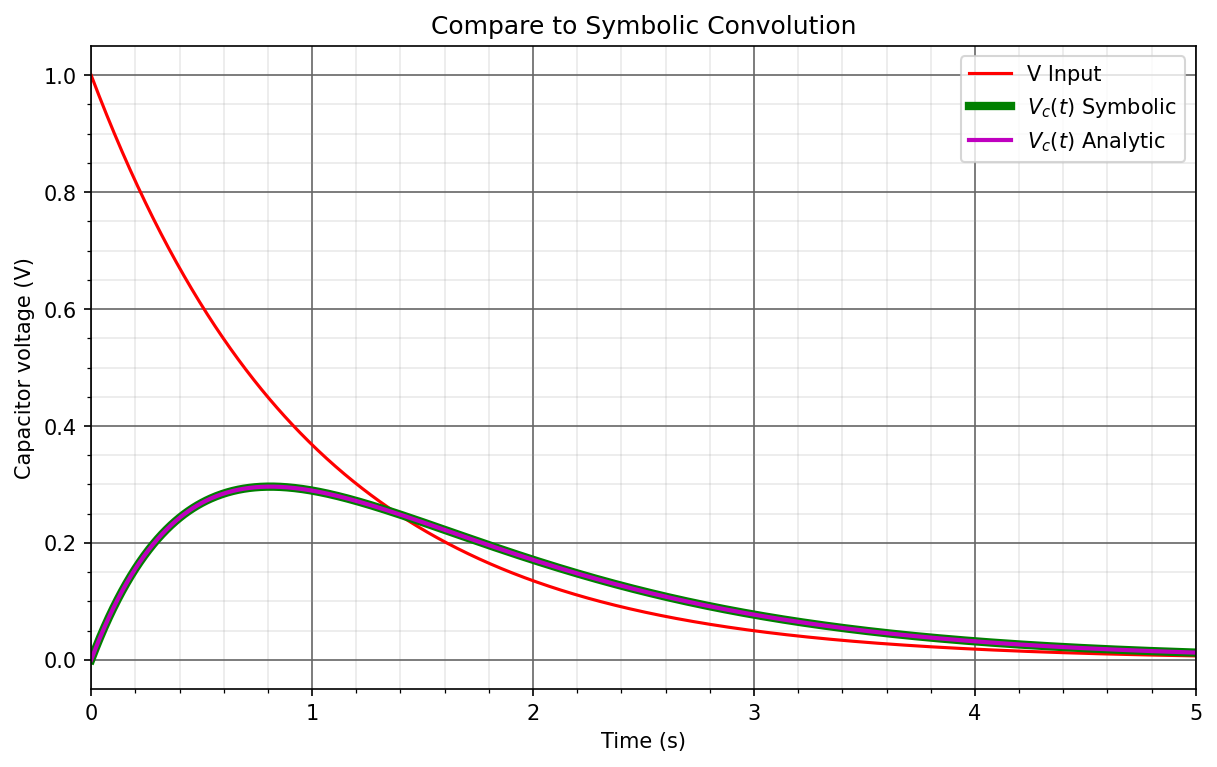

In [7]:
def convolve(f, g, t, lower_limit=-oo, upper_limit=oo):
    tau = Symbol('__very_unlikely_name__', real=True)
    return integrate(f.subs(t, tau) * g.subs(t, t - tau), (tau, lower_limit, upper_limit))

from sympy import exp
ts = Symbol('t')
f1 = exp(-1.5*ts) # impulse resp
f2 = exp(-1*ts) # input
f3 = convolve(f1, f2, ts, 0 ,ts) # full response
# check funational form found
print(f3)

lam_f1 = lambdify(ts, f1, modules=['numpy'])
lam_f2 = lambdify(ts, f2, modules=['numpy'])
lam_f3 = lambdify(ts, f3, modules=['numpy'])

fig = plt.figure(figsize=(8, 5),dpi=150,constrained_layout = True)
plt.plot(tt, lam_f2(tt),'r',label='V Input')
plt.plot(tt, lam_f3(tt),linewidth=4, ls='-', c='g', label='$V_c(t)$ Symbolic')
plt.plot(tt, e_analytic, linewidth=2, ls='-', c='m', label='$V_c(t)$ Analytic')

plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.minorticks_on()
plt.legend()
plt.xlim(0,5)
plt.xlabel('Time (s)')
plt.ylabel('Capacitor voltage (V)')
plt.title('Compare to Symbolic Convolution')
plt.show()